In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor


# 1) Preprocessing Data

#### Load Data

In [127]:
breast_cancer_data = pd.read_csv('data.txt', header=None, names=['id','target','mean radius', 'mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean symmetry', 'mean fractal dimension',
 'radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error','concavity error',
 'concave points error', 'symmetry error' ,'fractal dimension error',
 'worst radius', 'worst texture', 'worst perimeter', 'worst area',
 'worst smoothness', 'worst compactness' ,'worst concavity',
 'worst concave points' ,'worst symmetry', 'worst fractal dimension'])

In [128]:
feature_names = np.array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'])

In [129]:
breast_cancer_data.head()

,id,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Check for null values & drop ID column

In [130]:
print(breast_cancer_data.isnull().values.any())

breast_cancer_data.drop('id',axis=1,inplace=True)

False


In [131]:
for x in breast_cancer_data.head(0):
    print (x)

target
mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension


#### Convert M and B labels into binary 1 and 0, respectively

In [132]:
breast_cancer_data['target'] = breast_cancer_data['target'].map({'M':1,'B':0})

In [133]:
y = breast_cancer_data['target']

In [134]:
# y = np.ravel(breast_cancer_data['target'])

In [135]:
breast_cancer_data.drop('target',axis=1,inplace=True)

In [136]:
len(breast_cancer_data.columns)

30

#### Standardize data

In [137]:
X = pd.DataFrame(preprocessing.scale(breast_cancer_data))
X.columns = list(breast_cancer_data.columns)

In [138]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


#### Split the dataset in train and test at a ratio of 80% to 20% respectively:

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [140]:
X_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

# 2) Train Models and Evaluate Performance

### k-Nearest Neighbors

In [141]:
def knn(X_train,y_train):
    best_cv_score = 0
    best_cv_k = 0
    model = None 
    for k in range(1,25):
        knn_cv = KNeighborsClassifier(n_neighbors=k)
        scores_cv = cross_val_score(knn_cv, X_train, y_train, scoring='accuracy',cv=10)
        mean_scores_cv = scores_cv.mean()*100

#         print('Mean accuracy with 10-fold cross-validation is %s' % round(mean_scores_cv,2),' k=',k)

        if mean_scores_cv > best_cv_score:
            best_cv_score = mean_scores_cv
            best_cv_k = k
            model_knn = knn_cv
        model_knn.fit(X_train,y_train)
    return model_knn
#     knn_accuracy = model_knn.score(X_test,y_test)

#     return 'knn accuracy ',knn_accuracy

### Support Vector Machine

In [142]:
def svm(X_train,y_train):
    svm_model = SVC()
    svm_model.fit(X_train, y_train) 
    return svm_model
#     svm_score = svm_model.score(X_test, y_test)
#     return 'svm accuracy ',svm_score

### Logistic Regression

In [190]:
def lr(X_train,y_train):
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    scores = cross_val_score(lr, X_train, y_train, scoring='accuracy' ,cv=10).mean()
    print('lr-cross-val-score: '+str(scores))
    return lr
#     return ("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

### Random Forest

In [201]:
def rf(X_train,y_train):
    rf = RandomForestRegressor(n_estimators = 2000, random_state=0)

    rf.fit(X_train,y_train)
    return rf
#     rf_preds = rf.predict(X_test)
#     rf_accuracy = rf.score(X_test,y_test)
#     return('rf_accuracy ',rf_accuracy)

### SCORE

In [146]:
def score(model,X_test,y_test):
    return model.score(X_test,y_test)

### 

# 3) Feature Selection

In [147]:
malignant = X_train.loc[y_train == 1]

In [148]:
benign = X_train.loc[y_train == 0]

In [149]:
malignant_stats = malignant.describe()

In [150]:
benign_stats = benign.describe()

In [151]:
benign_stats.loc['min',]

mean radius               -2.029648
mean texture              -2.229249
mean perimeter            -1.984504
mean area                 -1.454443
mean smoothness           -3.112085
mean compactness          -1.610136
mean concavity            -1.114873
mean concave points       -1.261820
mean symmetry             -2.744117
mean fractal dimension    -1.551938
radius error              -1.059924
texture error             -1.554264
perimeter error           -1.044049
area error                -0.728456
smoothness error          -1.776065
compactness error         -1.298098
concavity error           -1.057501
concave points error      -1.913447
symmetry error            -1.332263
fractal dimension error   -1.096968
worst radius              -1.726901
worst texture             -2.223994
worst perimeter           -1.693361
worst area                -1.222423
worst smoothness          -2.682695
worst compactness         -1.443878
worst concavity           -1.305831
worst concave points      -1

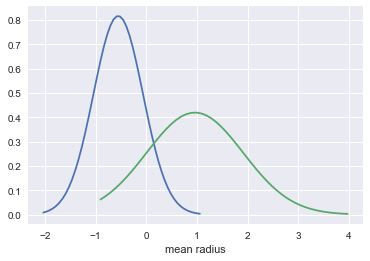

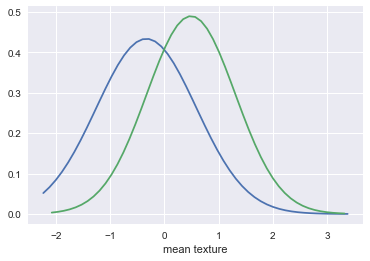

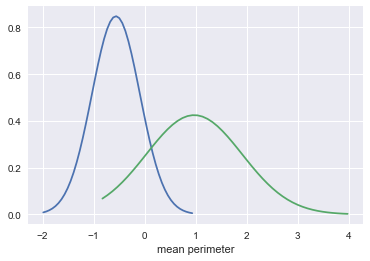

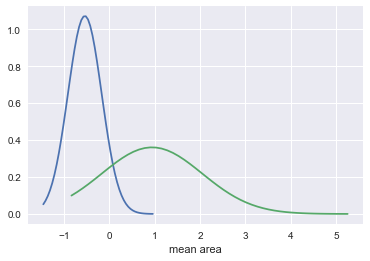

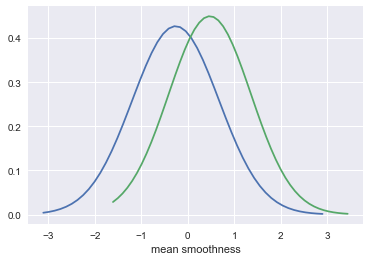

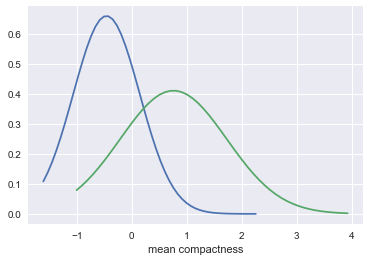

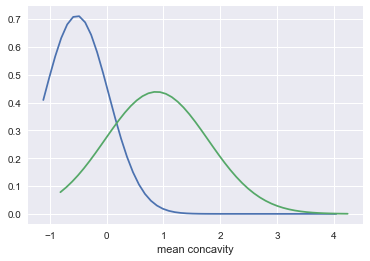

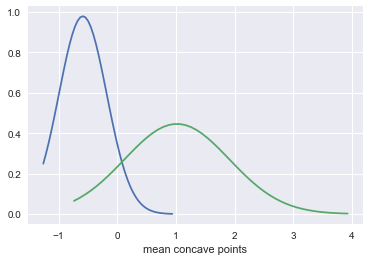

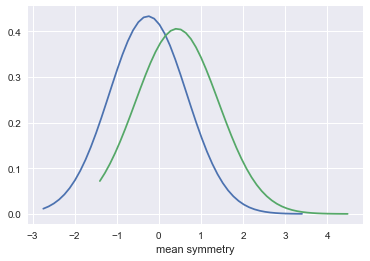

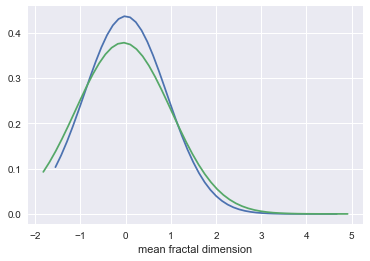

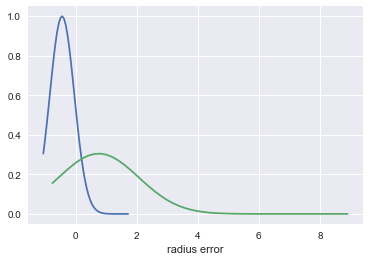

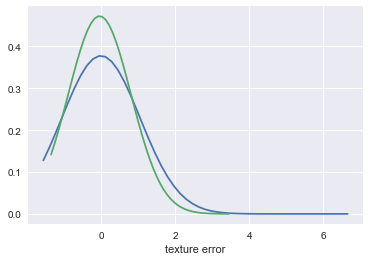

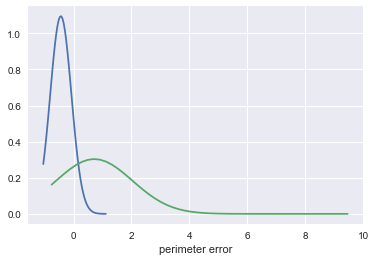

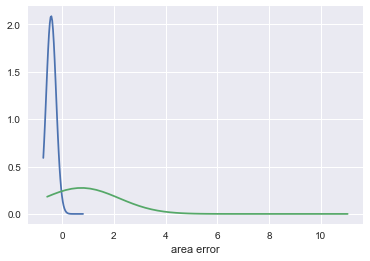

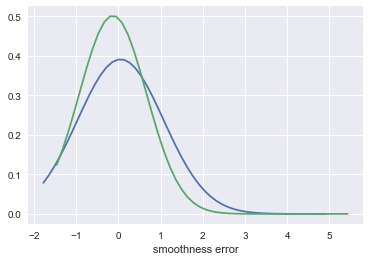

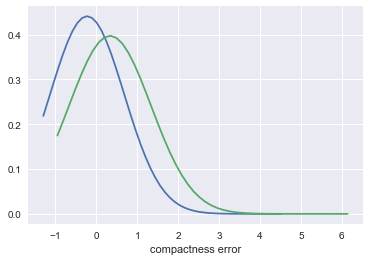

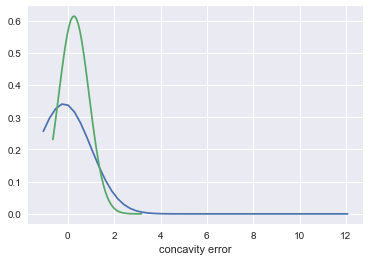

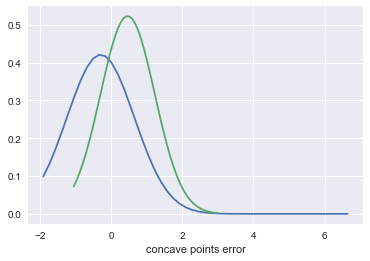

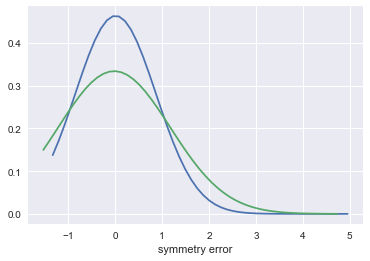

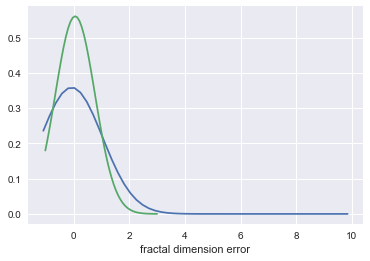

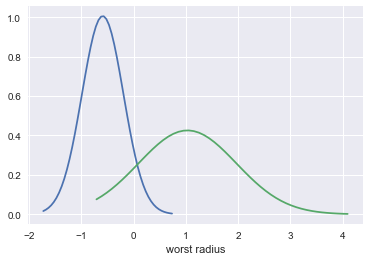

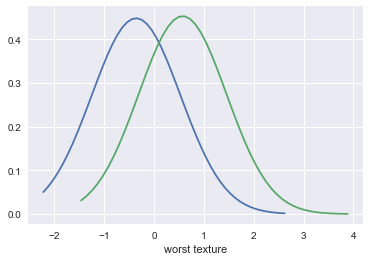

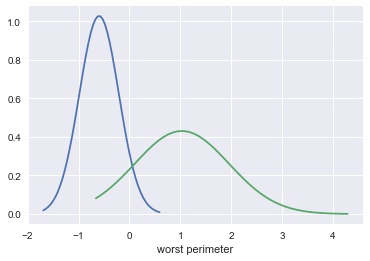

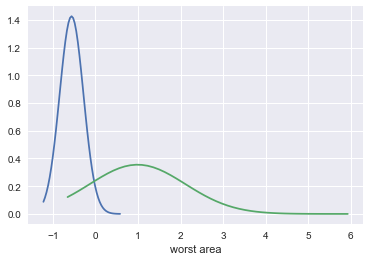

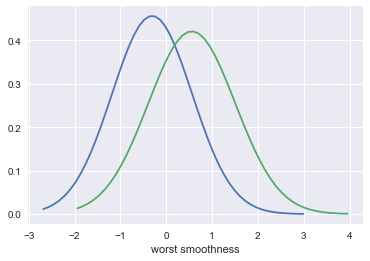

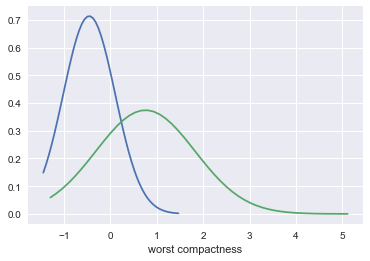

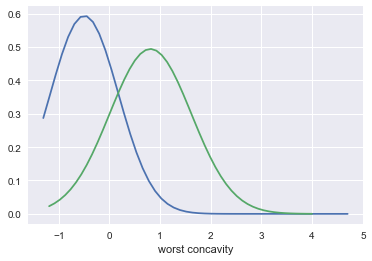

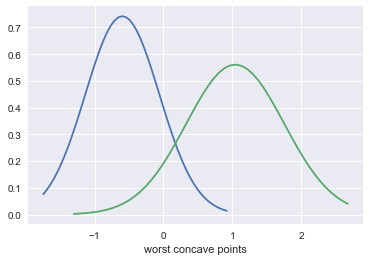

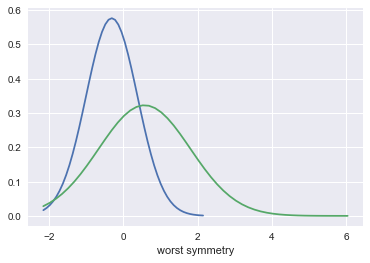

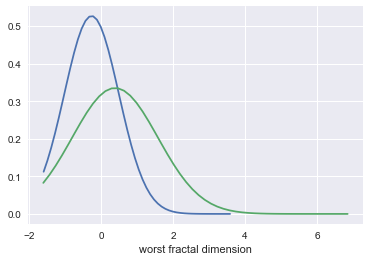

In [152]:
for p in feature_names:
    x_b = np.linspace(benign_stats.loc['min',p],benign_stats.loc['max',p])
    plt.plot(x_b,stats.norm.pdf(x=x_b,loc=benign_stats.loc['mean',p],scale=benign_stats.loc['std',p]))
    
    x_m = np.linspace(malignant_stats.loc['min',p],malignant_stats.loc['max',p])
    plt.plot(x_m,stats.norm.pdf(x=x_m,loc=malignant_stats.loc['mean',p],scale=malignant_stats.loc['std',p]))

#     plt.plot(data_benign[p],stats.norm.pdf(x=data_benign[p],loc=benign_stats.loc['mean',p],scale=benign_stats.loc['std',p]))

#     plt.plot(data_malignant[p],stats.norm.pdf(x=data_malignant[p],loc=malignant_stats.loc['mean',p],scale=malignant_stats.loc['std',p]))
    plt.xlabel(p)
    plt.show()
#     if p == 'mean fractal dimension': 
#         plt.xlabel('Figure 4: '+p)
    
#         plt.savefig('bad.png')
#     if p == 'worst radius': 
#         plt.xlabel('Figure 3: '+p)
# #         plt.savefig('good.png')
#     plt.show()
    

In [153]:
X_train.corrwith(y_train)

mean radius                0.724320
mean texture               0.409289
mean perimeter             0.736496
mean area                  0.699521
mean smoothness            0.360607
mean compactness           0.612290
mean concavity             0.691016
mean concave points        0.775765
mean symmetry              0.330913
mean fractal dimension    -0.025272
radius error               0.562805
texture error             -0.017631
perimeter error            0.551216
area error                 0.535500
smoothness error          -0.091815
compactness error          0.275226
concavity error            0.203364
concave points error       0.382164
symmetry error            -0.014406
fractal dimension error    0.061756
worst radius               0.770160
worst texture              0.452060
worst perimeter            0.775844
worst area                 0.724211
worst smoothness           0.420424
worst compactness          0.598603
worst concavity            0.655823
worst concave points       0

In [116]:
sns.set(color_codes=True)

In [34]:
# # for x in range(1,30,1):
# for x in feature_names:
#     print(x)
#     test1 = benign[x]
#     test2 = malignant[x]
    
#     upper = max(max(test1),max(test2))
    
#     bins = np.linspace(0, upper, 100)

#     plt.hist(test1, bins, alpha=0.5, label='benign')
#     plt.hist(test2, bins, alpha=0.5, label='malignant')
#     plt.legend(loc='upper right')
#     plt.show()

In [117]:
import seaborn as sns

In [118]:
type(y_train)

pandas.core.series.Series

In [119]:
swarmplot_data = X_train

In [120]:
swarmplot_data['target'] = y_train

C:\Users\rz336\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
swarmplot_data.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
277,1.329956,0.160649,1.191672,1.271629,-0.507430,-0.862311,-0.107964,0.245323,-0.955155,-1.819865,...,-0.224272,0.647508,0.624792,-0.353694,-0.879559,-0.245578,0.225259,-0.539944,-1.472721,1
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856,1
359,-1.332393,-0.225644,-1.324225,-1.070205,0.323071,-0.848666,-0.774633,-0.899156,-1.115796,0.962892,...,-0.107025,-0.937396,-0.775210,0.040829,-0.950170,-0.756994,-0.975815,-0.722753,-0.143295,0
192,-1.251733,-0.248914,-1.286742,-1.043186,-1.911524,-1.533193,-1.114873,-1.261820,-0.579108,0.237079,...,-0.789340,-1.340697,-1.013934,-2.682695,-1.443878,-1.305831,-1.745063,-1.604443,-1.017203,0
559,-0.743348,1.079841,-0.718729,-0.714976,-0.266890,-0.042470,0.281240,-0.202977,-1.546608,0.411444,...,1.869899,-0.744086,-0.714386,-0.112597,-0.016317,0.435670,-0.275239,-1.276034,0.186983,0


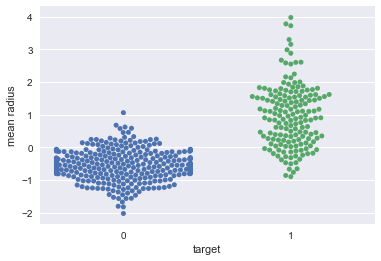

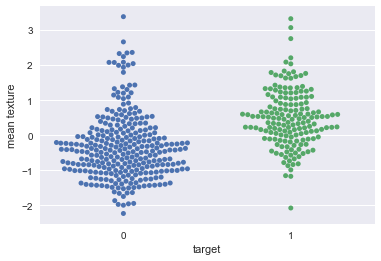

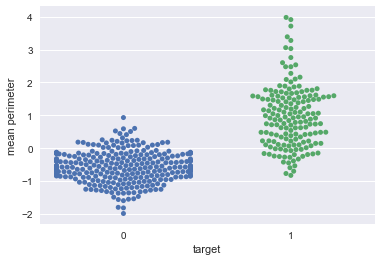

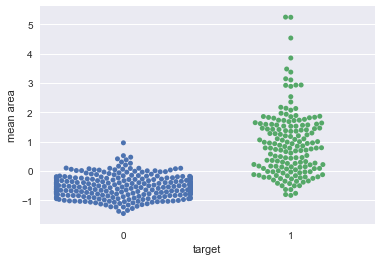

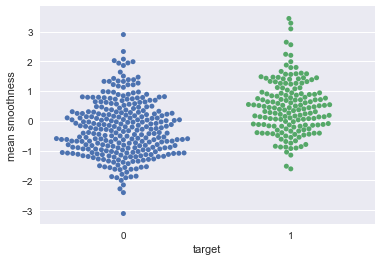

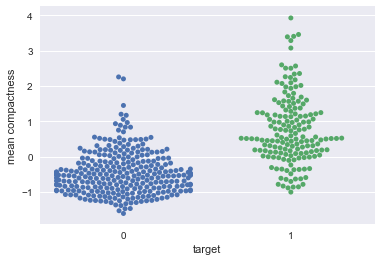

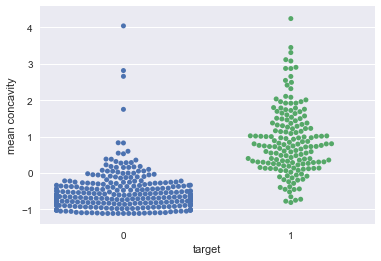

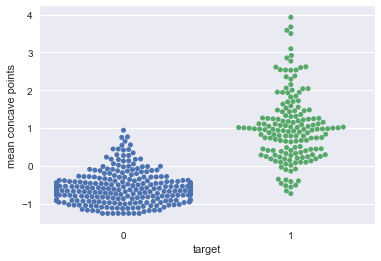

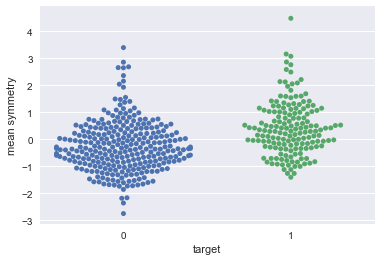

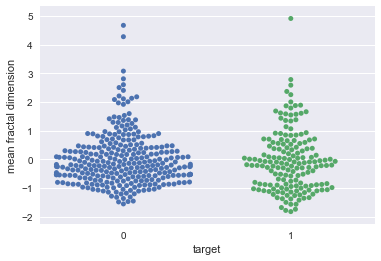

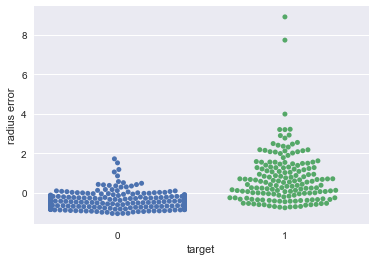

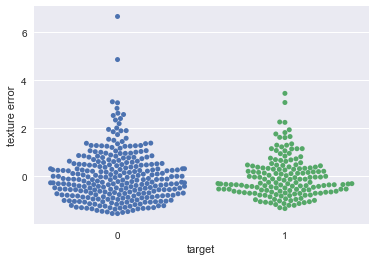

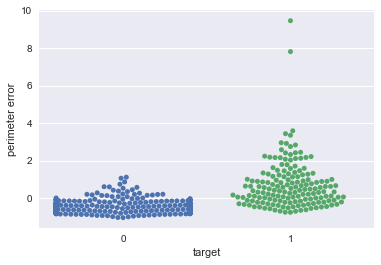

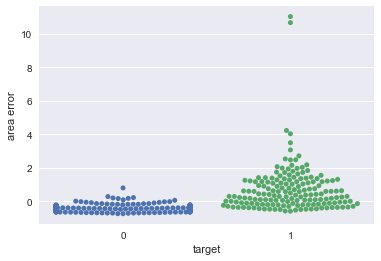

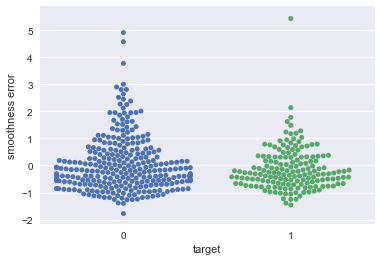

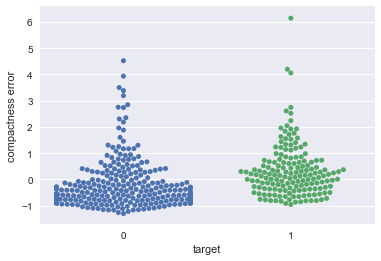

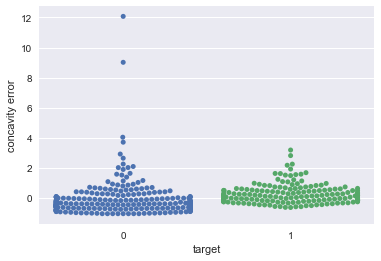

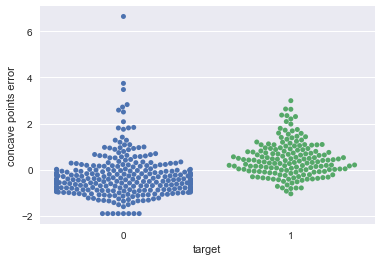

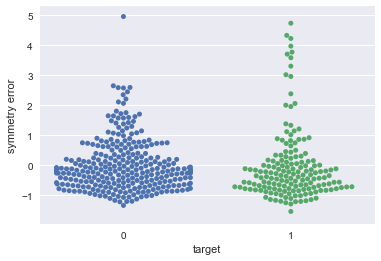

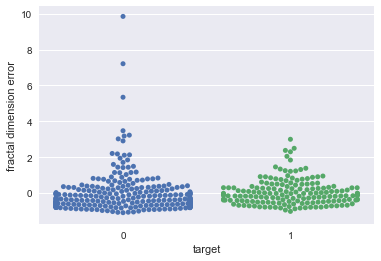

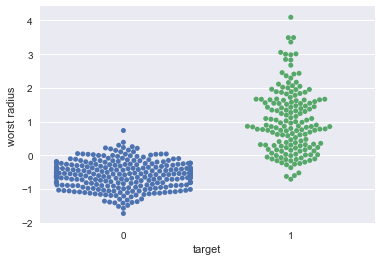

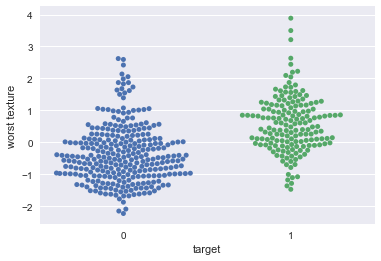

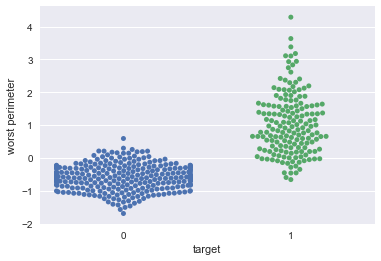

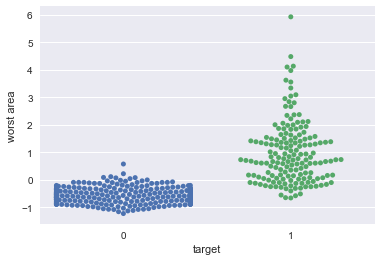

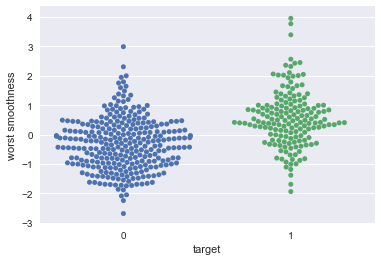

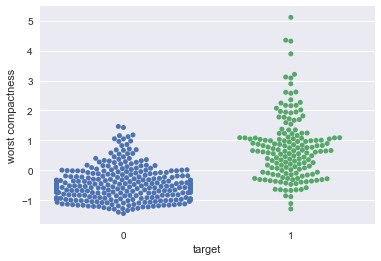

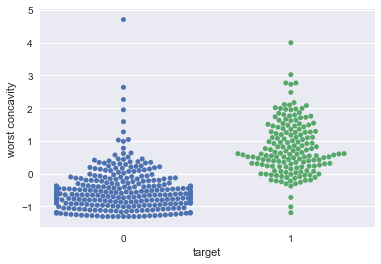

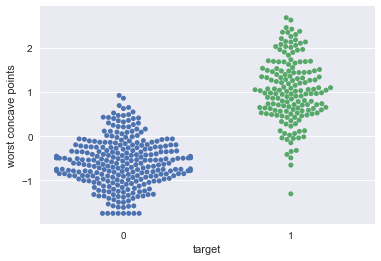

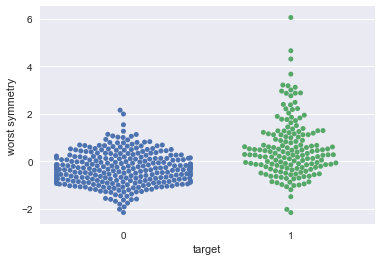

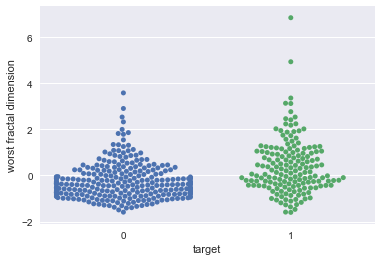

In [122]:
for fn in feature_names:
    _ = sns.swarmplot(y=fn, x='target', data=swarmplot_data)
    plt.show()

# Evaluate Models

In [154]:
X_train.shape

(455, 30)

In [191]:
for model in [lr,knn,svm,rf]:
    m = model(X_train,y_train)
#     print(str(model)+' accuracy-score: '+str(score(m,X_test,y_test)))
    print(str(model)+' accuracy-score: '+str(score(m,X_test,y_test)))

lr-cross-val-score: 0.9780676328502416
<function lr at 0x000001341CF7B1E0> accuracy-score: 0.9649122807017544
<function knn at 0x000001341BC4C950> accuracy-score: 0.9473684210526315
<function svm at 0x000001341BC4C730> accuracy-score: 0.9736842105263158
<function rf at 0x000001341D1D32F0> accuracy-score: 0.8810564944426802


## Feature Selection

### lr, knn, svm

In [157]:
drop_set_a = ['mean fractal dimension','texture error']
drop_set_b = ['mean smoothness', 'mean symmetry', 'smoothness error', 'compactness error']

In [158]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [159]:
keep_a = [a for a in feature_names if a not in drop_set_a]

In [160]:
keep_b = [b for b in keep_a if b not in drop_set_b]

In [161]:
X_train_a = X_train.loc[:,keep_a]
X_test_a = X_test.loc[:,keep_a]

In [162]:
X_train_b = X_train.loc[:,keep_b]
X_test_b = X_test.loc[:,keep_b]

In [192]:
for model in [lr,knn,svm,rf]:
    m = model(X_train_a,y_train)
    print(str(model)+' accuracy-score: '+str(score(m,X_test_a,y_test)))

lr-cross-val-score: 0.9780676328502416
<function lr at 0x000001341CF7B1E0> accuracy-score: 0.9649122807017544
<function knn at 0x000001341BC4C950> accuracy-score: 0.9473684210526315
<function svm at 0x000001341BC4C730> accuracy-score: 0.9649122807017544
<function rf at 0x000001341D1D32F0> accuracy-score: 0.8815256629088599


In [193]:
for model in [lr,knn,svm,rf]:
    m = model(X_train_b,y_train)
    print(str(model)+' accuracy-score: '+str(score(m,X_test_b,y_test)))

lr-cross-val-score: 0.9824637681159419
<function lr at 0x000001341CF7B1E0> accuracy-score: 0.9649122807017544
<function knn at 0x000001341BC4C950> accuracy-score: 0.9736842105263158
<function svm at 0x000001341BC4C730> accuracy-score: 0.9736842105263158
<function rf at 0x000001341D1D32F0> accuracy-score: 0.885806717688155


### Random Forest

In [194]:
rf = rf(X_train,y_train)

In [195]:
importance_mean = rf.feature_importances_.mean()

In [196]:
importance_mean

0.03333333333333334

In [197]:
keep_set = []

In [198]:
for feature in range(len(rf.feature_importances_)):
    if rf.feature_importances_[feature] > importance_mean:
        print(feature)
        keep_set.append(feature)

7
20
22
23
27


In [199]:
keep_set

[7, 20, 22, 23, 27]

In [202]:
rf_f_select = rf(X_train.iloc[:,keep_set],y_train)

In [203]:
rf_f_select_accuracy = score(rf_f_select,X_test.iloc[:,keep_set], y_test)

In [204]:
rf_f_select_accuracy

0.8859469550651

# NN